In [1]:
#import librariies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
data_f=pd.read_csv("train_HK6lq50.csv")
data_test=pd.read_csv("test_wF0Ps6O.csv")

In [4]:
data_f.shape,data_test.shape

((73147, 16), (31349, 15))

In [5]:
data_f.info(),data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

(None, None)

In [6]:
data_f.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [7]:
data_f.describe(include="all")

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,73147,73147,73147,73147.000000,73147.000000,73147,73147,73147.000000,73147,73147,73147.000000,45418.000000,73147.000000,73147,73070.000000,73147.000000
unique,73147,22,7,NaN,NaN,2,4,NaN,2,5,NaN,NaN,NaN,2,NaN,NaN
top,639_139,Y_1,Y,NaN,NaN,offline,easy,NaN,M,High School Diploma,NaN,NaN,NaN,N,NaN,NaN
freq,1,6687,22560,NaN,NaN,43543,40101,NaN,39043,34371,NaN,NaN,NaN,66577,NaN,NaN
mean,NaN,NaN,NaN,128.208676,91.079306,NaN,NaN,9843.079620,NaN,NaN,2.246845,36.494033,2.583934,NaN,2.395634,0.695408
std,NaN,NaN,NaN,6.889679,51.239048,NaN,NaN,5703.556093,NaN,NaN,1.011587,9.041119,1.240816,NaN,1.325288,0.460238
min,NaN,NaN,NaN,117.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,17.000000,1.000000,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,121.000000,45.000000,NaN,NaN,5040.000000,NaN,NaN,1.000000,28.000000,2.000000,NaN,1.000000,0.000000
50%,NaN,NaN,NaN,131.000000,90.000000,NaN,NaN,9641.000000,NaN,NaN,2.000000,39.000000,2.000000,NaN,2.000000,1.000000
75%,NaN,NaN,NaN,134.000000,135.000000,NaN,NaN,14552.000000,NaN,NaN,3.000000,45.000000,3.000000,NaN,4.000000,1.000000


In [8]:
data_f.isnull().sum(),data_test.isnull().sum()

(id                               0
 program_id                       0
 program_type                     0
 program_duration                 0
 test_id                          0
 test_type                        0
 difficulty_level                 0
 trainee_id                       0
 gender                           0
 education                        0
 city_tier                        0
 age                          27729
 total_programs_enrolled          0
 is_handicapped                   0
 trainee_engagement_rating       77
 is_pass                          0
 dtype: int64,
 id                               0
 program_id                       0
 program_type                     0
 program_duration                 0
 test_id                          0
 test_type                        0
 difficulty_level                 0
 trainee_id                       0
 gender                           0
 education                        0
 city_tier                        0
 age         

In [9]:
# let us conmbine both the data sets for feature engineering

In [10]:
data_com=pd.concat([data_f,data_test],axis=0,ignore_index="true",sort="false")

In [11]:
##data_train.to_csv(r"C:\Users\venkatesh\summatrain007.csv",index="false")

In [12]:
data_com.isnull().sum()

age                          39520
city_tier                        0
difficulty_level                 0
education                        0
gender                           0
id                               0
is_handicapped                   0
is_pass                      31349
program_duration                 0
program_id                       0
program_type                     0
test_id                          0
test_type                        0
total_programs_enrolled          0
trainee_engagement_rating      108
trainee_id                       0
dtype: int64

In [13]:
# let us remove the feature which does not make impact on the model

In [14]:
data_com=data_com.drop(['id'],axis=1)
data_com=data_com.drop(['trainee_id'],axis=1)


In [15]:
data_com=data_com.drop(['test_id'],axis=1)

In [16]:
data_com['trainee_engagement_rating'].value_counts()


1.0    36547
2.0    24636
4.0    18841
3.0    16352
5.0     8012
Name: trainee_engagement_rating, dtype: int64

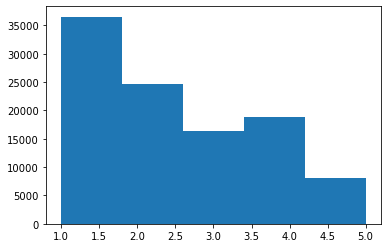

In [17]:
plt.hist(data_com['trainee_engagement_rating'], bins = 5)
plt.show()

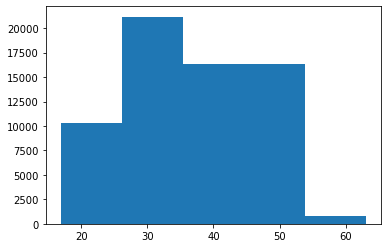

In [18]:
plt.hist(data_com['age'], bins = 5)
plt.show()

In [19]:
# lets us fill the nan values with the average

In [20]:
data_com['age']=data_com['age'].fillna(data_com['age'].mean())

In [21]:
arr=data_com.corr(method='pearson')
arr

,age,city_tier,is_pass,program_duration,total_programs_enrolled,trainee_engagement_rating
age,1.000000,-0.054999,0.058352,-0.014957,-0.054749,0.147057
city_tier,-0.054999,1.000000,-0.068663,-0.024032,0.017320,-0.049050
is_pass,0.058352,-0.068663,1.000000,0.003545,-0.031695,0.197383
program_duration,-0.014957,-0.024032,0.003545,1.000000,-0.005856,0.097955
total_programs_enrolled,-0.054749,0.017320,-0.031695,-0.005856,1.000000,0.083041
trainee_engagement_rating,0.147057,-0.049050,0.197383,0.097955,0.083041,1.000000


In [22]:
data_com['trainee_engagement_rating']=data_com['trainee_engagement_rating'].fillna(data_com['trainee_engagement_rating'].mean())

In [23]:
data_com.isnull().sum()

age                              0
city_tier                        0
difficulty_level                 0
education                        0
gender                           0
is_handicapped                   0
is_pass                      31349
program_duration                 0
program_id                       0
program_type                     0
test_type                        0
total_programs_enrolled          0
trainee_engagement_rating        0
dtype: int64

In [24]:
# let us try to split the data types and replace the dummies for categorical features

In [25]:
data_com.head()

,age,city_tier,difficulty_level,education,gender,is_handicapped,is_pass,program_duration,program_id,program_type,test_type,total_programs_enrolled,trainee_engagement_rating
0,24.000000,3,intermediate,Matriculation,M,N,0.0,136,Y_1,Y,offline,5,1.0
1,26.000000,4,easy,High School Diploma,F,N,1.0,131,T_1,T,offline,2,3.0
2,40.000000,1,easy,Matriculation,M,N,1.0,120,Z_2,Z,online,1,2.0
3,36.478038,3,easy,Matriculation,F,N,1.0,117,T_2,T,offline,4,1.0
4,42.000000,1,intermediate,High School Diploma,F,N,1.0,131,V_3,V,offline,2,4.0


In [26]:
data_num=data_com[data_com.select_dtypes(include=[np.number]).columns.tolist()]

In [27]:
data_num

,age,city_tier,is_pass,program_duration,total_programs_enrolled,trainee_engagement_rating
0,24.000000,3,0.0,136,5,1.0
1,26.000000,4,1.0,131,2,3.0
2,40.000000,1,1.0,120,1,2.0
3,36.478038,3,1.0,117,4,1.0
4,42.000000,1,1.0,131,2,4.0
...,...,...,...,...,...,...
104491,22.000000,2,NaN,134,2,1.0
104492,41.000000,1,NaN,133,2,3.0
104493,36.478038,2,NaN,136,3,4.0
104494,36.478038,3,NaN,136,1,1.0


In [28]:
data_obj=pd.get_dummies(data_com[data_com.select_dtypes(include=['object']).columns.tolist()])

In [29]:
data_obj.tail()

,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,gender_F,...,program_id_Z_3,program_type_S,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z,test_type_offline,test_type_online
104491,0,0,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
104492,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
104493,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
104494,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
104495,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [30]:
# #let us know convet age and program durartion to categorical.
sqt=data_num["program_duration"].unique().tolist()

In [31]:
sqt

[136, 131, 120, 117, 134, 135, 121, 133, 122, 130]

In [32]:
pro_map={117 : 1, 120 : 2 , 121 : 3, 122 : 4, 130 : 5, 131 : 6, 133 : 7, 134 : 8, 135 : 9, 136: 10}

In [33]:
data_num['program_duration'] = data_num['program_duration'].map(pro_map)

C:\Users\venkatesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
data_num["program_duration"]

0         10
1          6
2          2
3          1
4          6
          ..
104491     8
104492     7
104493    10
104494    10
104495     3
Name: program_duration, Length: 104496, dtype: int64

In [35]:
data_num["age"] = data_num["age"].astype(int)
data_num.loc[ data_num["age"] <= 18, 'Age'] = 0
data_num.loc[(data_num["age"] > 18) & (data_num["age"] <= 25), 'age'] = 1
data_num.loc[(data_num["age"] > 25) & (data_num["age"] <= 32), 'age'] = 2
data_num.loc[(data_num["age"] > 32) & (data_num["age"] <= 39), 'age'] = 3
data_num.loc[(data_num["age"] > 39) & (data_num["age"] <= 46), 'age'] = 4
data_num.loc[(data_num["age"] > 46) & (data_num["age"] <= 53), 'age'] = 5
data_num.loc[(data_num["age"] > 53) & (data_num["age"] <= 60), 'age'] = 6
data_num.loc[ data_num["age"] > 60, 'age'] = 7

C:\Users\venkatesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\venkatesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\venkatesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [36]:
data_num["age"]

0         1
1         2
2         4
3         3
4         4
         ..
104491    1
104492    4
104493    3
104494    3
104495    2
Name: age, Length: 104496, dtype: int32

In [37]:
data_final=pd.concat([data_num,data_obj],axis=1)

In [38]:
data_final['trainee_engagement_rating']=data_final['trainee_engagement_rating'].astype(int)
data_final.drop(["Age"],axis=1)

,age,city_tier,is_pass,program_duration,total_programs_enrolled,trainee_engagement_rating,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,...,program_id_Z_3,program_type_S,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z,test_type_offline,test_type_online
0,1,3,0.0,10,5,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,2,4,1.0,6,2,3,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4,1,1.0,2,1,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1.0,1,4,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4,1,1.0,6,2,4,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104491,1,2,NaN,8,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
104492,4,1,NaN,7,2,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
104493,3,2,NaN,10,3,4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
104494,3,3,NaN,10,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [39]:
##data_final.to_csv(r"C:\Users\venkatesh\finaldata007.csv",index="false")

In [40]:
data_train=data_final.iloc[:73147,:]
data_test=data_final.iloc[73147:104496,:]  

In [41]:
data_train.shape,data_test.shape

((73147, 51), (31349, 51))

In [42]:
data_train['is_pass']=data_train['is_pass'].astype(int)

C:\Users\venkatesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
data_train["is_pass"]

0        0
1        1
2        1
3        1
4        1
        ..
73142    1
73143    1
73144    1
73145    1
73146    1
Name: is_pass, Length: 73147, dtype: int32

In [44]:
# let us split the train data 
from sklearn.model_selection import train_test_split
x=data_train.drop(["is_pass",'Age'],axis=1)
y=data_train["is_pass"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
y

0        0
1        1
2        1
3        1
4        1
        ..
73142    1
73143    1
73144    1
73145    1
73146    1
Name: is_pass, Length: 73147, dtype: int32

In [46]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
logreg=LogisticRegression(max_iter=500)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
y_pred
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
score=roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1] )

In [47]:
##print(classification_report(y_test,y_pred))

In [48]:
logreg.predict_proba(x_test)[:,1]

array([0.45762549, 0.8458398 , 0.67889708, ..., 0.412846  , 0.90078246,
       0.82974861])

In [49]:
def model_threshold(logreg,x_test,threshold):
    import numpy as np
    return np.where(logreg.predict_proba(x_test)[:,1]>threshold,1,0)

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.1,0.1):
    y_predict=model_threshold(logreg,x_test,thr)
    print("threshold",thr)
    ##print(roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))
    print(confusion_matrix(y_test,y_predict))

threshold 0.0
[[    0  6620]
 [    0 15325]]
threshold 0.1
[[    0  6620]
 [    0 15325]]
threshold 0.2
[[   14  6606]
 [    1 15324]]
threshold 0.30000000000000004
[[  153  6467]
 [   60 15265]]
threshold 0.4
[[  634  5986]
 [  373 14952]]
threshold 0.5
[[ 1599  5021]
 [ 1140 14185]]
threshold 0.6000000000000001
[[ 2984  3636]
 [ 2763 12562]]
threshold 0.7000000000000001
[[4449 2171]
 [5723 9602]]
threshold 0.8
[[5721  899]
 [9892 5433]]
threshold 0.9
[[ 6504   116]
 [14184  1141]]
threshold 1.0
[[ 6620     0]
 [15325     0]]


In [51]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
score2=roc_auc_score(y_test,decisiontree.predict_proba(x_test)[:,1] )
fpr2, tpr2, thresholds2 = roc_curve(y_test, decisiontree.predict_proba(x_test)[:,1])


In [52]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
x2=data_train.drop(["is_pass",'Age'],axis=1)
y=data_train["is_pass"]
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y,test_size=0.3,random_state=0)
randomforest = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomforest.fit(x_train2, y_train2)
y_pred = randomforest.predict(x_test2)
score3=roc_auc_score(y_test2,randomforest.predict_proba(x_test2)[:,1] )
fpr3, tpr3, thresholds3 = roc_curve(y_test2, randomforest.predict_proba(x_test2)[:,1])
train_score3=roc_auc_score(y_train2,randomforest.predict_proba(x_train2)[:,1])
train_score3

0.926502425349952

In [53]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score4=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1] )
fpr4, tpr4, thresholds4 = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

In [54]:
# classical Naive Bayes
from sklearn.naive_bayes import CategoricalNB

classical = CategoricalNB()
classical.fit(x_train, y_train)
y_pred = classical.predict(x_test)
score5=roc_auc_score(y_test,classical.predict_proba(x_test)[:,1] )
fpr5, tpr5, thresholds5 = roc_curve(y_test, classical.predict_proba(x_test)[:,1])

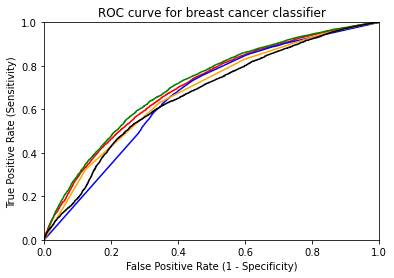

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',label='AUC = %100f'% score)
plt.plot(fpr2, tpr2,color='blue',label='model2'% score2)
plt.plot(fpr3, tpr3,color='green',label='model3'% score3)
plt.plot(fpr4, tpr4,color='orange',label='model3'% score4)
plt.plot(fpr5, tpr5,color='black',label='model3'% score5)
plt.show();

In [56]:
final_score=pd.DataFrame({'Model': ['logreg','decisiontree','randomforest','knn','Naive bayes'],
                         'auc_score':[score,score2,score3,score4,score5]})
final_score.sort_values(by='auc_score',ascending=False)

,Model,auc_score
2,randomforest,0.712990
0,logreg,0.702900
3,knn,0.682510
1,decisiontree,0.666444
4,Naive bayes,0.666374


In [57]:
## let us use the Random forsest model where we have hightest auc score.

data_test=data_test.drop(['Age','is_pass'],axis=1)

In [60]:
data_test

,age,city_tier,program_duration,total_programs_enrolled,trainee_engagement_rating,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_Bachelors,...,program_id_Z_3,program_type_S,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z,test_type_offline,test_type_online
73147,4,3,6,2,4,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
73148,3,3,9,4,4,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
73149,3,3,2,2,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
73150,3,1,4,2,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
73151,3,3,4,2,2,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104491,1,2,8,2,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
104492,4,1,7,2,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
104493,3,2,10,3,4,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
104494,3,3,10,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [61]:
y_finalprediction=randomforest.predict(data_test)

In [62]:
y_finalprediction

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
id_sub=pd.read_csv("test_wF0Ps6O.csv")
id_sum=id_sub['id']

In [ ]:
submission=pd.DataFrame({'id':id_sum,'is_pass':y_finalprediction})

In [ ]:
submission.to_csv(r"C:\Users\venkatesh\submission.csv",index="false")